### Biomass gasification reaction

CH$_a$O$_b$N$_c$ + $d$H$_2$O + $e$(O$_2$ + 3.76 N$_2$) ->   
   $\quad$
   $n_1$C + $n_2$H + $n_3$CO + $n_4$H$_2$O + 
   $n_5$CO$_2$ + $n_6$CH$_4$ + $n_7$N$_2$

$$
a = \frac {H}{C}
$$
$$
b = \frac {O}{C}
$$
$$
c = \frac {N}{C}
$$
where  
$C$- carbon from ultimate  
$H$- hydrogen from ultimate  
$O$- oxygen from ultimate  
$N$- nitrogen from ultimate  


In [22]:
# proximate
rawC = 43.19
rawH = 5.92
rawO = 50.17
rawN = 0.59

In [23]:
# normalize
sum = rawC + rawH + rawO + rawN

C = rawC/sum*100
H = rawH/sum*100
O = rawO/sum*100
N = rawN/sum*100

(C,H,O,N)

(43.24622008611194, 5.92770601782317, 50.23530589766697, 0.5907679983979173)

In [24]:
# biomass formula
# hydrogen/carbon
a = H / C
# oxygen/carbon
b = O / C
# nitrogen/carbon
c = N / C

In [25]:
import pandas as pd
df = pd.read_csv('gasif_data.csv')
df.head()

,FORMULA,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,...,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3
0,CO,46,CARBON-MONOXIDE,28.010,-205.1,-191.5,132.9,35.0,0.093,803.0,...,30.869,-0.012850,0.000028,-1.272000e-08,14.3686,530.22,-13.15,-210.0,-165.0,46.0
1,CO2,48,CARBON-DIOXIDE,44.010,-56.6,-78.5,304.2,73.8,0.094,777.0,...,19.795,0.073436,-0.000056,1.715300e-08,22.5898,3103.39,-0.16,-119.0,-69.0,48.0
2,CH4,64,METHANE,16.043,-182.5,-161.5,190.6,46.0,0.099,425.0,...,19.251,0.052126,0.000012,-1.132000e-08,15.2243,597.84,-7.16,-180.0,-153.0,64.0
3,C2H4,92,ETHYLENE,28.054,-169.2,-103.8,282.4,50.4,0.129,577.0,...,3.806,0.156590,-0.000083,1.755100e-08,15.5368,1347.01,-18.15,-153.0,-91.0,92.0
4,CH4O,65,METHANOL,32.042,-97.7,64.6,512.6,81.0,0.118,791.0,...,21.152,0.070924,0.000026,-2.852000e-08,18.5875,3626.55,-34.29,-16.0,91.0,65.0


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 30 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   FORMULA        9 non-null      object 
 1   NO             9 non-null      int64  
 2   COMPOUND-NAME  9 non-null      object 
 3   MOLWT          9 non-null      float64
 4   TFP            9 non-null      float64
 5   TBP            9 non-null      float64
 6   TC             9 non-null      float64
 7   PC             9 non-null      float64
 8   VC             9 non-null      float64
 9   LDEN           9 non-null      float64
 10  TDEN           9 non-null      float64
 11  HVAP           9 non-null      float64
 12  NO.1           9 non-null      float64
 13  Unnamed: 13    0 non-null      float64
 14  Unnamed: 14    0 non-null      float64
 15  NO.2           9 non-null      int64  
 16  VISA           9 non-null      float64
 17  VISB           9 non-null      float64
 18  DELHF         

In [27]:
df.set_index("FORMULA", inplace=True)
df

,NO,COMPOUND-NAME,MOLWT,TFP,TBP,TC,PC,VC,LDEN,TDEN,...,CPVAPA,CPVAPB,CPVAPC,CPVAPD,ANTA,ANTB,ANTC,TMN,TMX,NO.3
FORMULA,,,,,,,,,,,,,,,,,,,,,
CO,46,CARBON-MONOXIDE,28.010,-205.1,-191.5,132.9,35.0,0.093,803.0,-192.0,...,30.869,-0.012850,0.000028,-1.272000e-08,14.3686,530.22,-13.15,-210.0,-165.0,46.0
CO2,48,CARBON-DIOXIDE,44.010,-56.6,-78.5,304.2,73.8,0.094,777.0,20.0,...,19.795,0.073436,-0.000056,1.715300e-08,22.5898,3103.39,-0.16,-119.0,-69.0,48.0
CH4,64,METHANE,16.043,-182.5,-161.5,190.6,46.0,0.099,425.0,-161.0,...,19.251,0.052126,0.000012,-1.132000e-08,15.2243,597.84,-7.16,-180.0,-153.0,64.0
C2H4,92,ETHYLENE,28.054,-169.2,-103.8,282.4,50.4,0.129,577.0,-110.0,...,3.806,0.156590,-0.000083,1.755100e-08,15.5368,1347.01,-18.15,-153.0,-91.0,92.0
CH4O,65,METHANOL,32.042,-97.7,64.6,512.6,81.0,0.118,791.0,20.0,...,21.152,0.070924,0.000026,-2.852000e-08,18.5875,3626.55,-34.29,-16.0,91.0,65.0
H2O,20,WATER,18.015,0.0,100.0,647.3,220.5,0.056,998.0,20.0,...,32.243,0.001924,0.000011,-3.596000e-09,18.3036,3816.44,-46.13,11.0,168.0,20.0
O2,34,OXYGEN,31.999,-218.8,-183.0,154.6,50.5,0.073,1149.0,-183.0,...,28.106,-0.000004,0.000017,-1.065000e-08,15.4075,734.55,-6.45,-210.0,-173.0,34.0
H2,19,HYDROGEN,2.016,-259.2,-252.8,33.2,13.0,0.065,71.0,-253.0,...,27.143,0.009274,-0.000014,7.645100e-09,13.6333,164.90,3.19,-259.0,-248.0,19.0
N2,31,NITROGEN,28.013,-209.9,-195.8,126.2,33.9,0.090,805.0,-195.0,...,31.150,-0.013570,0.000027,-1.168000e-08,14.9542,588.72,-6.60,-219.0,-183.0,31.0


In [28]:
dfGF = df['DELGF']
dfGF


FORMULA
CO     -137.37
CO2    -394.65
CH4     -50.87
C2H4     68.16
CH4O   -162.62
H2O    -228.77
O2        0.00
H2        0.00
N2        0.00
Name: DELGF, dtype: float64

In [29]:
[gfCO, gfCO2, gfCH4, gfC2H4, gfCH4O, gfH2O, gfO2, gfH2, gfN2] = list(dfGF)
gfC = 0.0

In [30]:
gfCO, gfCO2, gfCH4, gfC2H4, gfCH4O, gfH2O, gfO2, gfH2, gfN2, gfC

(-137.37, -394.65, -50.87, 68.16, -162.62, -228.77, 0.0, 0.0, 0.0, 0.0)

In [31]:
def ke(G, T, R):
    return math.exp(-G/R/T)


def computeGibbs(G,n):
    sum = 0
    for i,v in enumerate(G):
        sum += G[i]*n[i]
    
    return sum

def equilb_const(G, R, T):
    return math.exp(-G/R/T)

### Calculate reactions gibbs free energy

In [43]:
# 202

# Carbon Reactions
## Boudouard
## R1: CO2 + C -> 2CO
gfR1 = computeGibbs([gfCO2, gfC, gfCO], [-1, -1, 2])

## water-gas or steam
## R2: C + H2O -> H2 + CO
gfR2 = computeGibbs([gfC, gfH2O, gfH2, gfCO], [-1, -1, 1, 1])

## hydrogasification
## R3: C + 2H2 -> CH4
gfR3 = computeGibbs([gfC, gfH2, gfCH4], [-1, -2, 1])

## R4: C + 0.5 O2 -> CO
gfR4 = computeGibbs([gfC, gfO2, gfCO], [-1, -.5, 1])

# Oxidation Reactions
## R5: C + O2 -> CO2
gfR5 = computeGibbs([gfC, gfO2, gfCO2], [-1, -1, 1])

## R6: CO + 0.5 O2 -> CO2
gfR6 = computeGibbs([gfCO, gfO2, gfCO2], [-1, -.5, 1])

## R7: CH4 + 2O2 -> CO2 + 2H2O
gfR7 = computeGibbs([gfCH4, gfO2, gfCO2, gfH2O], [-1, -2, 1, 2])

## R8: H2 + 0.5O2 -> H2O
gfR8 = computeGibbs([gfH2, gfO2, gfH2O], [-1, -.5, 1])

# Shift Reactions
## R9: CO + H2O -> CO2 + H2
gfR9 = computeGibbs([gfCO, gfH2O, gfCO2, gfH2], [-1, -1, 1, 1])

## Methanation Reactions
## R10: 2CO + 2H2 -> CH4 + CO2
gfR10 = computeGibbs([gfCO, gfH2, gfCH4, gfCO2], [-2, -2, 1, 1])

## R11: CO + 3H2 -> CH4 + H2O
gfR11 = computeGibbs([gfCO, gfH2, gfCH4, gfH2O], [-1, -3, 1, 1])

## R14: CO2 + 4H2 -> CH4 + 2H2O
gfR14 = computeGibbs([gfCO, gfH2, gfCH4, gfH2O], [-1, -4, 1, 2])

# Steam-Reforming Reactions
## R12: CH4 + H2O -> CO + 3H2
gfR12 = computeGibbs([gfCH4, gfH2O, gfCO, gfH2], [-1, -1, 1, 3])

## R13: CH4 + 0.5O2 -> CO + 2H2
gfR13 = computeGibbs([gfCH4, gfO2, gfCO, gfH2], [-1, -.5, 1, 2])

# Split Reactions 
## R15: CO2 -> CO + 0.5O2
gfR15 = computeGibbs([gfCO2, gfCO, gfO2], [-1, 1, 0.5])

(gfR1, gfR2, gfR3, gfR9, gfR15)


(119.90999999999997, 91.4, -50.87, -28.50999999999999, 257.28)

### Gasification solution

In [53]:
from scipy.optimize import fsolve
import math

def gasification(
    # CHaObNc
    C = 43.19,
    H = 5.92,
    N = 0.59,
    O = 50.16,

    # H2O
    d = 1,
    # air
    e = 1,
    # pressure
    P = 1,
    T = (600+273.15) #K
    ):

    R = 8.3145 #J/mol K
    # T = 10 + 273.15 #K

    Ke1 = equilb_const(gfR1*1000, R, T)
    Ke2 = equilb_const(gfR2*1000, R, T)
    Ke3 = equilb_const(gfR3*1000, R, T)

    a = H/C
    b = O/C
    c = N/C
    def func(x):
        return [
            x[0]+x[2]+x[4]+x[5]-1,
            2.0*x[1]+2.0*x[3]+4.0*x[5]-a-2*d,
            x[2]+x[3]+2*x[4]-b-d-2*e,
            x[6]-c-7.52*e,
            x[1]+x[2]+x[4]+x[5]+x[6]-x[7],
            x[4]*x[7]*Ke1 - (x[2]**2)*P,
            x[3]*x[7]*Ke2 - x[1]*x[2]*P,
            (x[3]**2)*Ke3*P - x[5]*x[7],
        ]

    root = fsolve(func, [1,1,1,1,1,1,1,1])

    (C,H2,CO,H2O,CO2,CH4,N2,nT) = tuple(root)
    
    tot = H2 + CO + H2O + CO2 + CH4 + N2

    (fH2,fCO,fH2O,fCO2,fCH4,fN2) = (H2/tot, CO/tot, H2O/tot, CO2/tot, CH4/tot, N2/tot)


    return {'C':abs(C),'H2':H2,'CO':CO,'H2O':H2O,'CO2':CO2,'CH4':CH4,'N2':N2,'fH2':fH2,'fCO':fCO,'fCO2':fCO2,'fCH4':fCH4}

In [54]:
import pandas as pd 
import numpy as np

Temp=np.arange(100,2000,50)
Press=[1,2,3,4]
Steam=[0,1,2,3,4]
Air=[0,1,2,3,4]

rlt=[]

for T in Temp:
    for P in Press:
        for d in Steam:
            for e in Air:        
                data = gasification(
                    C=C,H=H,O=O,N=N,
                    T=T+273.15, P=P, d=d, e=e)
                data['T']=T
                data['P']=P
                data['Steam']=d
                data['Air']=e

                
                rlt.append(data)


dfW = pd.DataFrame(rlt)

dfW

C:\sdk\Python38\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last ten iterations.
  warnings.warn(msg, RuntimeWarning)
C:\sdk\Python38\lib\site-packages\scipy\optimize\minpack.py:175: RuntimeWarning: The iteration is not making good progress, as measured by the 
  improvement from the last five Jacobian evaluations.
  warnings.warn(msg, RuntimeWarning)


,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
0,0.384967,9.154650e-09,9.155484e-09,0.000040,0.580786,0.034247,0.013661,1.456046e-08,1.456179e-08,0.923739,0.054470,100,1,0,0
1,0.614919,1.433894e-07,1.434114e-07,0.000154,1.580729,0.034190,7.533661,1.567314e-08,1.567555e-08,0.172781,0.003737,100,1,0,1
2,1.614859,3.859270e-07,3.848265e-07,0.000214,2.580699,0.034160,15.053661,2.184237e-08,2.178009e-08,0.146060,0.001933,100,1,0,2
3,2.614813,7.566719e-08,7.425118e-08,0.000260,3.580676,0.034137,22.573661,2.889303e-09,2.835234e-09,0.136726,0.001304,100,1,0,3
4,3.614773,4.798352e-08,4.708521e-08,0.000299,4.580656,0.034117,30.093661,1.382462e-09,1.356581e-09,0.131974,0.000983,100,1,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3795,3.268631,4.383885e-02,6.250161e-02,0.355773,2.371668,1.834461,0.013661,9.363466e-03,1.334962e-02,0.506561,0.391819,1950,4,4,0
3796,4.040151,1.057132e-01,1.247986e-01,0.584465,3.226174,1.689178,7.533661,7.969937e-03,9.408831e-03,0.243228,0.127351,1950,4,4,1
3797,4.898379,1.511101e-01,1.820256e-01,0.732152,4.123717,1.592636,15.053661,6.920448e-03,8.336300e-03,0.188856,0.072939,1950,4,4,2
3798,5.794806,1.869059e-01,2.381204e-01,0.845874,5.038808,1.517877,22.573661,6.147969e-03,7.832586e-03,0.165743,0.049928,1950,4,4,3


In [55]:
dfW2 = abs(dfW)

In [56]:
# drop negative values

dfDrop =dfW.loc[(dfW['H2'] < 0) | (dfW['CO'] < 0) | (dfW['CO2'] < 0) | (dfW['CH4'] < 0)]

dfR = dfW.drop(list(dfDrop.index))
dfDrop.head()


,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
54,3.614900,-1.941159e-09,-1.584996e-09,0.000173,4.580719,0.034181,30.093661,-5.592710e-11,-4.566563e-11,0.131976,0.000985,100,3,0,4
251,0.614572,-1.530484e-08,-5.353987e-09,0.000501,1.580555,0.034017,7.533661,-1.672892e-09,-5.852162e-10,0.172762,0.003718,200,3,0,1
254,3.614100,-1.600751e-07,2.169246e-08,0.000973,4.580319,0.033781,30.093661,-4.611953e-09,6.249857e-10,0.131964,0.000973,200,3,0,4
276,0.614639,-5.803777e-08,-4.869616e-08,0.000434,1.580589,0.034050,7.533661,-6.343804e-09,-5.322721e-09,0.172766,0.003722,200,4,0,1
277,1.614470,-9.756174e-08,-7.580293e-08,0.000603,2.580504,0.033966,15.053661,-5.521717e-09,-4.290230e-09,0.146049,0.001922,200,4,0,2


In [57]:
# query
P = 1
d = 2
e = 0
dfQ = dfR[(dfR['P']==P) & (dfR['Steam']==d) & (dfR['Air']==e)]
dfQ.head()

,C,H2,CO,H2O,CO2,CH4,N2,fH2,fCO,fCO2,fCH4,T,P,Steam,Air
10,1.614619,2.757948e-08,2.748925e-08,0.000454,1.580579,1.034040,0.013661,1.049155e-08,1.045722e-08,0.601270,0.393361,100,1,2,0
110,1.613878,2.493845e-07,2.490765e-07,0.001195,1.580208,1.033670,0.013661,9.486868e-08,9.475151e-08,0.601129,0.393220,150,1,2,0
210,1.612510,1.401160e-06,1.397252e-06,0.002563,1.579523,1.032985,0.013661,5.330170e-07,5.315304e-07,0.600868,0.392959,200,1,2,0
310,1.610322,5.621615e-06,5.591630e-06,0.004751,1.578428,1.031889,0.013661,2.138521e-06,2.127115e-06,0.600450,0.392541,250,1,2,0
410,1.607168,1.387823e-05,6.985277e-06,0.007902,1.576851,1.030309,0.013661,5.279416e-06,2.657268e-06,0.599850,0.391940,300,1,2,0


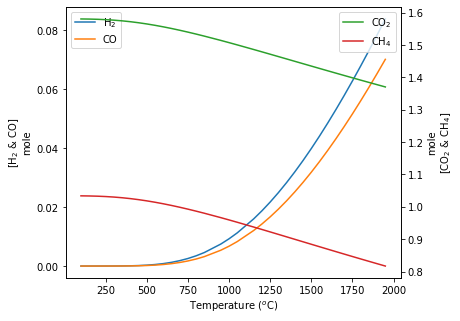

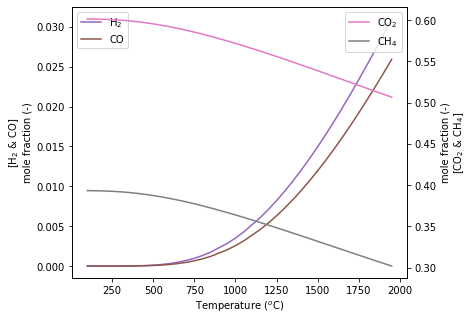

In [58]:
# plot gases vs Temperature

import matplotlib.pyplot as plt

x = list(dfQ['T'])
y = list(dfQ['H2'])

fig, ax1 = plt.subplots(figsize=(6,5))
color = next(ax1._get_lines.prop_cycler)['color']
line1 = ax1.plot(x, dfQ['H2'], color=color, label='H$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
line2 = ax1.plot(x, dfQ['CO'], color=color, label='CO')
ax1.set_xlabel('Temperature ($^o$C)')
ax1.set_ylabel('[H$_2$ & CO]\nmole')
ax1.legend()

ax1x = ax1.twinx()

color = next(ax1._get_lines.prop_cycler)['color']
line3 = ax1x.plot(x, dfQ['CO2'], color=color, label='CO$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
line4 = ax1x.plot(x, dfQ['CH4'], color=color, label='CH$_4$')
ax1x.set_ylabel('mole\n[CO$_2$ & CH$_4$]')
ax1x.legend()
# ax1.legend([line1,line2,line3,line4],['H2','CO','CO2','CH4'])

fig, ax2 = plt.subplots(figsize=(6,5))
color = next(ax1._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['fH2'], color=color, label='H$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
ax2.plot(x, dfQ['fCO'], color=color, label='CO')
ax2.set_xlabel('Temperature ($^o$C)')
ax2.set_ylabel('[H$_2$ & CO]\nmole fraction (-)')
ax2.legend()

ax2x = ax2.twinx()

color = next(ax1._get_lines.prop_cycler)['color']
ax2x.plot(x, dfQ['fCO2'], color=color, label='CO$_2$')
color = next(ax1._get_lines.prop_cycler)['color']
ax2x.plot(x, dfQ['fCH4'], color=color, label='CH$_4$')
ax2x.set_ylabel('mole fraction (-)\n[CO$_2$ & CH$_4$]')
ax2x.legend()

plt.show()

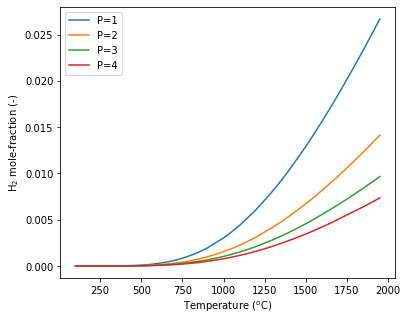

In [59]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for P in Press:
    for d in Steam[1:2]:
        for e in Air[0:1]:
            dfQ1 = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]


            ax.plot(dfQ1['T'], dfQ1['fH2'], label=f'P={P}')

ax.set_xlabel('Temperature ($^o$C)')
ax.set_ylabel('H$_2$ mole-fraction (-)')
ax.legend()

plt.show()

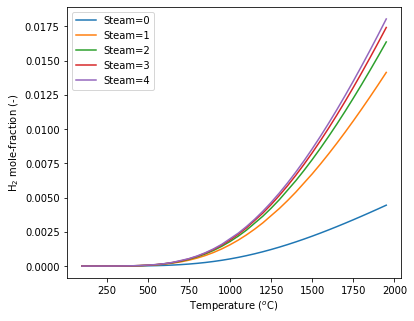

In [60]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for d in Steam:
    for e in Air[0:1]:
        for P in Press[1:2]:
            dfQ2 = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]


            ax.plot(dfQ2['T'], dfQ2['fH2'], label=f'Steam={d}')

ax.set_xlabel('Temperature ($^o$C)')
ax.set_ylabel('H$_2$ mole-fraction (-)')
ax.legend()

plt.show()

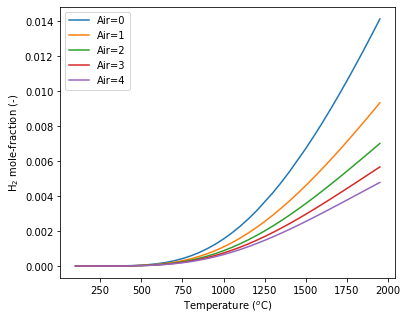

In [61]:
fig, ax = plt.subplots(figsize=(6,5))

# for T in Temp:
for e in Air:
    for d in Steam[1:2]:
        for P in Press[1:2]:
            dfQ3 = dfR[
                    # (dfR['T']==T) 
                    # & 
                    (dfR['P']==P) 
                    & 
                    (dfR['Steam']==d) 
                    & 
                    (dfR['Air']==e)
                    ]


            ax.plot(dfQ3['T'], dfQ3['fH2'], label=f'Air={e}')

ax.set_xlabel('Temperature ($^o$C)')
ax.set_ylabel('H$_2$ mole-fraction (-)')
ax.legend()

plt.show()

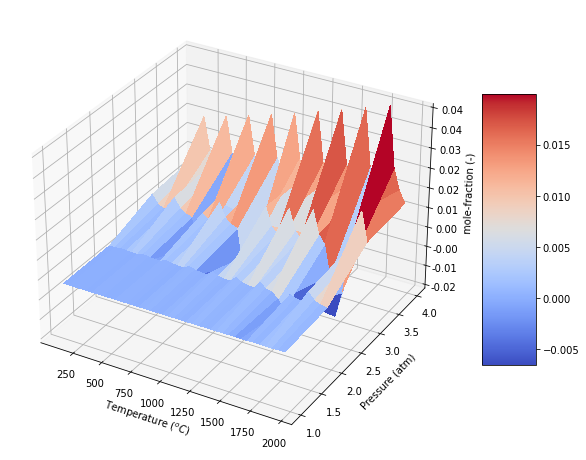

In [62]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

d = Steam[1]
e = Air[0]
dfQ4 = dfW[
        # (dfR['T']==T) 
        # & 
        # (dfR['P']==P) 
        # & 
        (dfW['Steam']==d) 
        & 
        (dfW['Air']==e)
        ]

# Make data.
X = Temp
Y = Press
X, Y = np.meshgrid(X, Y)
v = dfQ4['H2'].to_numpy()
Z = v.reshape(4,-1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(min(v), max(v))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Temperature ($^oC$)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('mole-fraction (-)')

plt.show()

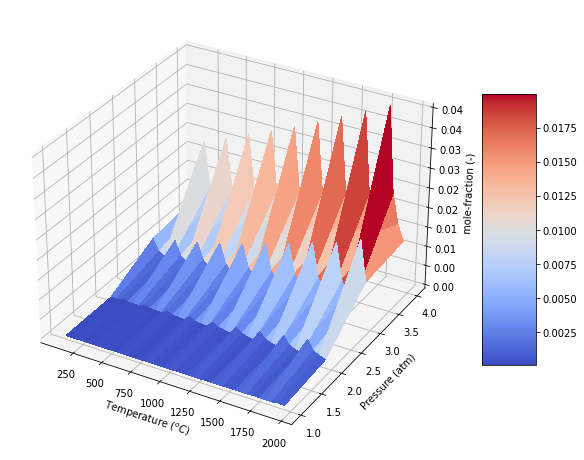

In [63]:
import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator
import numpy as np

fig, ax = plt.subplots(subplot_kw={"projection": "3d"}, figsize=(10,10))

d = Steam[1]
e = Air[0]
dfQ4 = dfW2[
        # (dfR['T']==T) 
        # & 
        # (dfR['P']==P) 
        # & 
        (dfW['Steam']==d) 
        & 
        (dfW['Air']==e)
        ]

# Make data.
X = Temp
Y = Press
X, Y = np.meshgrid(X, Y)
v = dfQ4['H2'].to_numpy()
Z = v.reshape(4,-1)

# Plot the surface.
surf = ax.plot_surface(X, Y, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

# surf = ax.plot_surface(X, Y, Z, cmap='viridis', edgecolor='none')

# Customize the z axis.
ax.set_zlim(min(v), max(v))
ax.zaxis.set_major_locator(LinearLocator(10))
# A StrMethodFormatter is used automatically
ax.zaxis.set_major_formatter('{x:.02f}')

# Add a color bar which maps values to colors.
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_xlabel('Temperature ($^oC$)')
ax.set_ylabel('Pressure (atm)')
ax.set_zlabel('mole-fraction (-)')

plt.show()